# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [2]:
from calcimetry.mongo_api import MongoInfo

# parameters where the database is stored, can obviously be distant.
HOST='localhost'
PORT=27017

### Retrieves all drill names

In [31]:
from calcimetry.calcimetry_api import CalcimetryAPI

mongo_info = MongoInfo(host=HOST, port=PORT)
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

/data/andra
{'OHZ2026', 'PEP1001', 'MCO3001', 'OHZ7006', 'PAC1001', 'OHZ1845', 'KEY1202', 'TPV1322', 'OHZ7101', 'OHZ2010', 'OHZ2024', 'PAC1002', 'SUG1301', 'OHZ1841', 'SDZ1258', 'DIR2003', 'KEY1002', 'BPE4024', 'OHZ6562', 'PEP1002', 'SUG2101', 'NSC1412', 'GIS1001', 'NSC1414', 'SUG1202', 'MCO3002', 'SUG2028', 'OHZ6565', 'OHZ2004', 'FOR1001', 'KEY1206', 'DCN2002', 'IBE2002', 'PAC2003', 'SUG1102', 'OHZ6563', 'MCC1701', 'FOR1002', 'TPV1321', 'GGD4024', 'SDZ1290', 'OHZ2001', 'DIR1001', 'KEY1003', 'OHZ2005', 'OHZ2009', 'OHZ2029', 'OHZ6126', 'OHZ2028', 'REP2301', 'SUG2020', 'OHZ1302', 'OHZ2030', 'GGD4023', 'SDZ1289', 'OHZ5310', 'DCN2003', 'MAG3003', 'OHZ2021', 'REP2104', 'OHZ2008', 'GIS1002', 'PGZ1022', 'FRO1001', 'OHZ2023', 'DIR1003', 'MAG3002', 'NIH2011', 'OHZ6128', 'OHZ2027', 'SUG1104', 'OHZ2020', 'SUG1203', 'OHZ3004', 'SUG1302', 'REP2206', 'OHZ7004', 'SUG1107', 'KEY1005', 'DIR2002', 'TER1203', 'OHZ6561', 'NIH2002', 'MAG3001', 'KEY1006', 'OHZ1844', 'NSC1411', 'TER1202', 'OHZ1703', 'TER1201

### Retrieves image ids for one drillname
 

In [8]:
drillname="BPE4023"
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_images_id(drillname))

/data/andra
[0, 1, 2, 3, 4, 5, 6, 7]


### Retrieve one image and its description from its id

/data/andra
{'ImageId': 1, 'FileName': 'GTR2012-07_0023_BPE4023_0090_0200.jpg', 'DrillName': 'BPE4023', 'Cote0': 90, 'Cote1': 200, 'PxSize': 3456, 'PySize': 630, 'px0': 172, 'px1': 3311, 'k_Up': [[11, 187], [556, 189], [1081, 190], [1590, 189], [1945, 184], [2358, 187], [2922, 194], [3447, 206]], 'k_Down': [[8, 344], [591, 346], [1157, 348], [1505, 349], [2440, 344], [2651, 341], [2917, 347], [3454, 356]], 'k_Arrow': [[10, 268], [1373, 268], [1693, 271], [1980, 272], [2437, 277], [2491, 261], [2856, 264], [2932, 283], [3134, 286], [3454, 286]]}
# of measurements for this img: 8


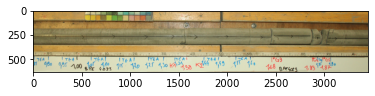

In [24]:
import matplotlib.pyplot as plt
from calcimetry.carrot_img import CarrotImage
IMG_ID = 1
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID)
    plt.imshow(img.jpg)

    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [25]:
from calcimetry.measurement import Measurement

idx_measure = 3
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



Measure (9): (125->32)


Text(0.5, 0, 'val1m: 32')

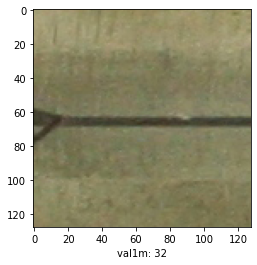

In [30]:
dim = 128
center = (
    img.p_x(measure.cote) + dim // 2, # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote) # get on k_arrow line the position in pixel from this measure
    )
vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


### Retrieves images infos as a pandas dataframe

In [32]:
import pandas as pd
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

/data/andra
   ImageId                               FileName DrillName  Cote0  Cote1  \
0      867  GTR2005-08_0037_KEY1207_0000_0091.jpg   KEY1207      0     91   
1      868  GTR2005-08_0037_KEY1207_0093_0191.jpg   KEY1207     93    191   
2      869  GTR2005-08_0037_KEY1207_0126_0210.jpg   KEY1207    126    210   
3     1437  GTR2020-02_0003-OHZ5310_0000_0108.JPG   OHZ5310      0    108   
4     1438  GTR2020-02_0003-OHZ5310_0078_0199.JPG   OHZ5310     78    199   

   PxSize  PySize    px0      px1  \
0    2048     447  136.0   2022.0   
1    2048     468    1.0   2027.0   
2    1920     480    0.0   1741.0   
3   19113    4038  102.0  19073.0   
4    5158    1019    5.0   5123.0   

                                                k_Up  \
0  [[207, 138], [591, 141], [891, 148], [1262, 15...   
1  [[8, 141], [359, 139], [643, 142], [1065, 148]...   
2  [[1, 136], [84, 140], [471, 139], [825, 145], ...   
3  [[10578, 1263], [10624, 1256], [10860, 1269], ...   
4  [[4, 302], [601, 28